In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
df = pd. read_csv('/content/auto-mpg.csv')

In [ ]:
df.keys()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
# converting horse power object to integer
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Finding null value index in horsepower

In [ ]:

nan_indexes = [df[df['horsepower'].isna()].index]
nan_indexes

[Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')]

In [ ]:
df_summary = df.describe()
df_summary

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# filling  'horsepower'  missing values
for index in nan_indexes:
  df['horsepower'][index] = df_summary['horsepower']['mean']

<ipython-input-79-ada6425c39fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'][index] = df_summary['horsepower']['mean']


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
df = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']]

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model year'}>,
        <Axes: title={'center': 'origin'}>, <Axes: >]], dtype=object)

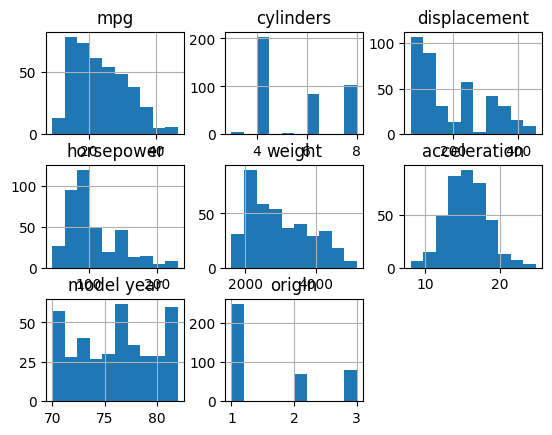

In [ ]:
viz = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']]
viz.hist()

<Axes: >

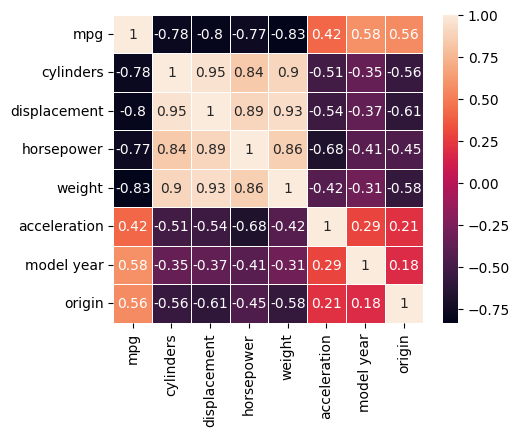

In [ ]:
import seaborn as sns

viz = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year','origin']]
correlation_matrix = viz.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True ,linewidths=0.6)


In [ ]:
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


Text(0, 0.5, 'mpg')

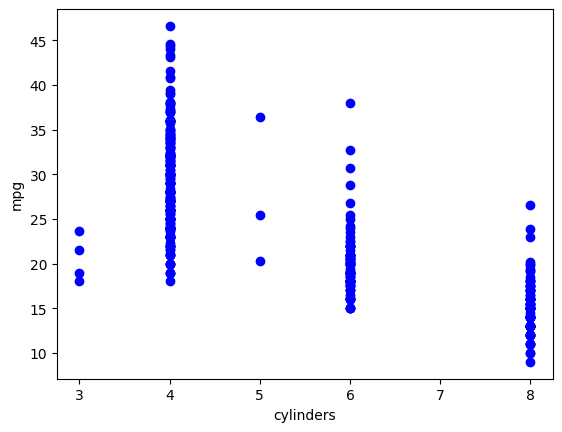

In [ ]:
plt.scatter( df['cylinders'] , df['mpg'] , color ="blue")
plt.xlabel('cylinders')
plt.ylabel('mpg')

Text(0, 0.5, 'mpg')

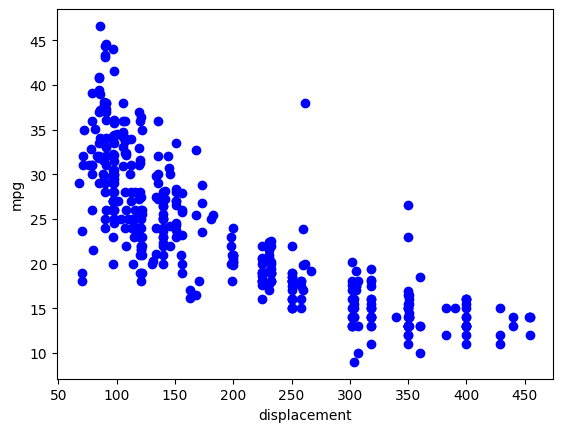

In [ ]:
plt.scatter( df['displacement'] , df['mpg'] , color ="blue")
plt.xlabel('displacement')
plt.ylabel('mpg')

In [ ]:
#split data

msk = np.random.rand( len(df)) <0.8
train = df[ msk]
test = df[ ~msk]

In [ ]:
from sklearn import linear_model
regression_model  = linear_model.LinearRegression()

train_x = np.asanyarray( train[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']])

train_y = np.asanyarray(train[['mpg']])

regression_model.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regression_model.coef_)
print ('Intercept: ',regression_model.intercept_)

Coefficients:  [[-0.3105784   0.01424576 -0.01076492 -0.00649727  0.14280023  0.75487423
   1.14379548]]
Intercept:  [-18.50705888]


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray( test[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']])
test_y = np.asanyarray(test[['mpg']])
test_y_ = regression_model.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 2.38
Residual sum of squares (MSE): 9.99
R2-score: 0.81


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/penguins_lter.csv')

removing unecessary attribute


In [ ]:

df = df.drop( 'Comments', axis = 1)
df = df.drop( 'Sample Number', axis = 1)
df = df.drop('Individual ID',axis = 1)
df= df.drop('Stage', axis =1)


In [ ]:
df= df.drop('Date Egg', axis =1)

In [ ]:
df = df.replace( {'MALE':1, 'FEMALE':0} )
df['Sex'] = pd.to_numeric(df['Sex'], errors='coerce')

In [ ]:
df.dtypes

studyName               object
Species                 object
Region                  object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                    float64
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

In [ ]:
df.keys()

Index(['studyName', 'Species', 'Region', 'Island', 'Clutch Completion',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [ ]:
df

,studyName,Species,Region,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,39.1,18.7,181.0,3750.0,1.0,NaN,NaN
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,39.5,17.4,186.0,3800.0,0.0,8.94956,-24.69454
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,40.3,18.0,195.0,3250.0,0.0,8.36821,-25.33302
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,36.7,19.3,193.0,3450.0,0.0,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,Yes,46.8,14.3,215.0,4850.0,0.0,8.41151,-26.13832
341,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,Yes,50.4,15.7,222.0,5750.0,1.0,8.30166,-26.04117
342,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,Yes,45.2,14.8,212.0,5200.0,0.0,8.24246,-26.11969


<ipython-input-39-15c71620ff0d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = viz.corr()


<Axes: >

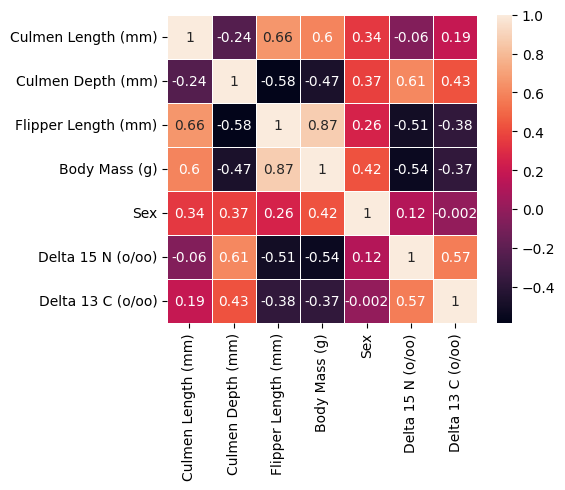

In [ ]:
import seaborn as sns
viz = df[['studyName', 'Species', 'Region', 'Island',
       'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]
correlation_matrix = viz.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True ,linewidths=0.6)

In [ ]:
df.isnull().sum()

studyName               0
Species                 0
Region                  0
Island                  0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [ ]:
df_summary = df.describe()
df_summary

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
count,342.000000,342.000000,342.000000,342.000000,333.000000,330.000000,331.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.504505,8.733382,-25.686292
std,5.459584,1.974793,14.061714,801.954536,0.500732,0.551770,0.793961
min,32.100000,13.100000,172.000000,2700.000000,0.000000,7.632200,-27.018540
25%,39.225000,15.600000,190.000000,3550.000000,0.000000,8.299890,-26.320305
50%,44.450000,17.300000,197.000000,4050.000000,1.000000,8.652405,-25.833520
75%,48.500000,18.700000,213.000000,4750.000000,1.000000,9.172123,-25.062050
max,59.600000,21.500000,231.000000,6300.000000,1.000000,10.025440,-23.787670


In [ ]:
df.isnull().sum()

studyName               0
Species                 0
Region                  0
Island                  0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

Filling Null Values by Mean

In [ ]:
# Findin indexs of null values in each attribute
cl_nan_index = [df[df['Culmen Length (mm)'].isna()].index]
cd_nan_index= [df[df['Culmen Depth (mm)'].isna()].index]
fl_nan_index = [df[df['Flipper Length (mm)'].isna()].index]
bm_nan_index = [df[df['Body Mass (g)'].isna()].index]
sex_nan_index = [df[df['Sex'].isna()].index]
delta15_nan_index = [df[df['Delta 15 N (o/oo)'].isna()].index]
delta13_nan_index = [df[df['Delta 13 C (o/oo)'].isna()].index]

delta13_nan_index

[Int64Index([0, 3, 8, 11, 12, 13, 15, 39, 41, 46, 47, 250, 339], dtype='int64')]

In [ ]:
for index  in cl_nan_index:
  df['Culmen Length (mm)'][index] = df_summary['Culmen Length (mm)']['mean']

<ipython-input-44-1a2491a9ddc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Culmen Length (mm)'][index] = df_summary['Culmen Length (mm)']['mean']


In [ ]:

for index  in cd_nan_index:
  df['Culmen Depth (mm)'][index] = df_summary['Culmen Depth (mm)']['mean']

<ipython-input-45-a185fdfceba5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Culmen Depth (mm)'][index] = df_summary['Culmen Depth (mm)']['mean']


In [ ]:
for index  in fl_nan_index:
  df['Flipper Length (mm)'][index] = df_summary['Flipper Length (mm)']['mean']

<ipython-input-46-9be707720e77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Flipper Length (mm)'][index] = df_summary['Flipper Length (mm)']['mean']


In [ ]:
for index  in bm_nan_index:
  df['Body Mass (g)'][index] = df_summary['Body Mass (g)']['mean']

<ipython-input-47-3117192a5ddb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Body Mass (g)'][index] = df_summary['Body Mass (g)']['mean']


In [ ]:
for index  in sex_nan_index:
  df['Sex'][index] = df_summary['Sex']['max']

<ipython-input-48-22c714d87699>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'][index] = df_summary['Sex']['max']


In [ ]:
for index  in delta15_nan_index:
  df['Delta 15 N (o/oo)'][index] = df_summary['Delta 15 N (o/oo)']['mean']

<ipython-input-49-4349dcfa7226>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delta 15 N (o/oo)'][index] = df_summary['Delta 15 N (o/oo)']['mean']


In [ ]:
for index  in delta13_nan_index:
  df['Delta 13 C (o/oo)'][index] = df_summary['Delta 13 C (o/oo)']['mean']

<ipython-input-50-324914750cdb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delta 13 C (o/oo)'][index] = df_summary['Delta 13 C (o/oo)']['mean']


All null values removed by mean and mode

In [ ]:
df.isnull().sum()

studyName              0
Species                0
Region                 0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [ ]:
df.head()

,studyName,Species,Region,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,39.10000,18.70000,181.000000,3750.000000,1.0,8.733382,-25.686292
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,39.50000,17.40000,186.000000,3800.000000,0.0,8.949560,-24.694540
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,40.30000,18.00000,195.000000,3250.000000,0.0,8.368210,-25.333020
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,43.92193,17.15117,200.915205,4201.754386,1.0,8.733382,-25.686292
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,Yes,36.70000,19.30000,193.000000,3450.000000,0.0,8.766510,-25.324260


converting String into integer by replacement by 0,1 or one hot encoding

In [ ]:
df['Clutch Completion'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df = df.replace( {'Yes':1, 'No':0} )
df['Clutch Completion'] = pd.to_numeric(df['Clutch Completion'], errors='coerce')

In [ ]:
#replacing string of  Region
df = df.replace( {'Anvers' :1} )
df['Region'] = pd.to_numeric(df['Region'], errors='coerce')

In [ ]:
df['Island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
#replacing string of  Island
df = df.replace( {'Torgersen' :1 ,'Biscoe':2 , 'Dream': 3} )
df['Island'] = pd.to_numeric(df['Island'], errors='coerce')

In [ ]:
# pip install -U scikit-learn

One hot encoding on StudyName attribute

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:



# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Reshape the 'study' column to a 2D array
study_values = df['studyName'].values.reshape(-1, 1)


# Fit the encoder on the study values
encoder.fit(study_values)

# Transform the data
encoded_data = encoder.transform(study_values)

# Retrieve the feature names
feature_names = encoder.get_feature_names_out(['studyName'])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Concatenate the encoded columns back to the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original 'studyName' column if desired
df_encoded.drop('studyName', axis=1, inplace=True)

df = df_encoded


In [ ]:
df.sample(n=10, random_state=42)

,Species,Region,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),studyName_PAL0708,studyName_PAL0809,studyName_PAL0910
194,Chinstrap penguin (Pygoscelis antarctica),1,3,1,50.9,19.1,196.0,3550.0,1.0,10.02372,-24.86594,0.0,1.0,0.0
157,Chinstrap penguin (Pygoscelis antarctica),1,3,1,45.2,17.8,198.0,3950.0,0.0,8.88942,-24.49433,1.0,0.0,0.0
225,Gentoo penguin (Pygoscelis papua),1,2,1,46.5,13.5,210.0,4550.0,0.0,7.99530,-25.32829,1.0,0.0,0.0
208,Chinstrap penguin (Pygoscelis antarctica),1,3,1,45.2,16.6,191.0,3250.0,0.0,9.62357,-24.78984,0.0,0.0,1.0
318,Gentoo penguin (Pygoscelis papua),1,2,1,48.4,14.4,203.0,4625.0,0.0,8.16582,-26.13971,0.0,0.0,1.0
329,Gentoo penguin (Pygoscelis papua),1,2,1,48.1,15.1,209.0,5500.0,1.0,8.45738,-26.22664,0.0,0.0,1.0
319,Gentoo penguin (Pygoscelis papua),1,2,1,51.1,16.5,225.0,5250.0,1.0,8.20660,-26.36863,0.0,0.0,1.0
260,Gentoo penguin (Pygoscelis papua),1,2,0,42.7,13.7,208.0,3950.0,0.0,8.14567,-26.59467,0.0,1.0,0.0
114,Adelie Penguin (Pygoscelis adeliae),1,2,1,39.6,20.7,191.0,3900.0,0.0,8.80967,-26.78958,0.0,0.0,1.0
220,Gentoo penguin (Pygoscelis papua),1,2,1,46.1,13.2,211.0,4500.0,0.0,7.99300,-25.51390,1.0,0.0,0.0


In [ ]:
df.dtypes

Species                 object
Region                   int64
Island                   int64
Clutch Completion        int64
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                    float64
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
studyName_PAL0708      float64
studyName_PAL0809      float64
studyName_PAL0910      float64
dtype: object

In [ ]:
df.keys()

Index(['Species', 'Region', 'Island', 'Clutch Completion',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'studyName_PAL0708', 'studyName_PAL0809', 'studyName_PAL0910'],
      dtype='object')

In [ ]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split( df, test_size=0.3) # our main data split into train and test


In [ ]:
train_X = train[['Region', 'Island', 'Clutch Completion',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'studyName_PAL0708', 'studyName_PAL0809', 'studyName_PAL0910']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['Region', 'Island', 'Clutch Completion',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'studyName_PAL0708', 'studyName_PAL0809', 'studyName_PAL0910']] # taking test data feature
test_y = test.Species # output value of the test data

In [ ]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
model1 = LogisticRegression(random_state=0, max_iter=60)

model1.fit(train_X, train_y)

prediction1 = model1.predict(test_X)
print('The accuracy of the Logistic Regression is: ', metrics.accuracy_score(prediction1, test_y))

The accuracy of the Logistic Regression is:  0.9807692307692307


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
model3 = KNeighborsClassifier()

model3.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction3 = model3.predict(test_X)
print('The accuracy of the K-Neighbors Classifier is: ', metrics.accuracy_score(prediction3, test_y)) # we check the accuracy of the algorithm


The accuracy of the K-Neighbors Classifier is:  0.7692307692307693


In [ ]:
from sklearn import svm
model4 = svm.SVC(kernel='linear')

# we train the algorithm with training data and training output
model4.fit(train_X, train_y)

prediction4 = model4.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction4, test_y)) # we check the accuracy of the algorithm


The accuracy of the SVM is:  1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier # for using DTA
model2 = DecisionTreeClassifier()

model2.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction2 = model2.predict(test_X)
print('The accuracy of the Decision Tree Classifier is: ', metrics.accuracy_score(prediction2, test_y))

The accuracy of the Decision Tree Classifier is:  0.9711538461538461
